In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Uploading the dataset
data = pd.read_csv("players.csv")
data


,id,name,now_cost,position,team,web_name,transfers_in_event,influence_rank_type,news_added,ict_index_rank_type,...,now_cost_rank_type,ict_index,now_cost_rank,minutes,yellow_cards,cost_change_event_fall,red_cards,value_form,ict_index_rank,total_points
0,1,Folarin Balogun,44,FWD,Arsenal,Balogun,0,61,2023-08-31T08:55:15.272751Z,63,...,94,0.0,528,0,0,0,0,0.0,628,0
1,93,Mads Bech Sørensen,40,DEF,Brentford,Bech,0,194,2023-09-01T21:46:46.639465Z,195,...,180,0.0,657,0,0,0,0,0.0,542,0
2,649,Thomas Cannon,45,FWD,Everton,Cannon,0,72,2023-09-02T08:53:38.905296Z,74,...,75,0.0,416,1,0,0,0,0.0,672,1
3,54,Jaden Philogene-Bidace,45,MID,Aston Villa,Philogene,0,219,2023-09-02T08:48:12.680336Z,216,...,248,0.3,426,3,0,0,0,0.0,475,1
4,264,Ellis Simms,45,FWD,Everton,Simms,0,65,2023-07-11T08:42:12.779256Z,67,...,68,0.0,383,0,0,0,0,0.0,653,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,749,Matthew Whittingham,45,MID,Wolves,Whittingham,13,269,,272,...,250,0.0,428,0,0,0,0,0.0,680,0
765,750,Tawanda Chirewa,45,MID,Wolves,Chirewa,20,277,,280,...,258,0.0,441,0,0,0,0,0.0,693,0
766,751,Justin Hubner,40,DEF,Wolves,Hubner,151,217,,217,...,211,0.0,703,0,0,0,0,0.0,579,0
767,769,Owen Hesketh,45,MID,Wolves,Hesketh,11,257,,260,...,232,0.0,401,0,0,0,0,0.0,663,0


In [155]:

data['age'] = np.random.randint(18, 36, size=len(data))
data['minutes '] = pd.to_numeric(data['minutes '].str.strip(), errors='coerce') #Tham số errors='coerce' sẽ chuyển đổi các giá trị không thể chuyển thành số thành NaN.
data['matches_played'] = (data['minutes '] / 90).round()


## Total Goal Efficiency by Position

In [156]:
position_data = data.groupby('position ').agg({
    'goals_scored ': 'sum',
    'matches_played': 'sum'
}).reset_index()

position_data['goals_scored '] = pd.to_numeric(position_data['goals_scored '], errors='coerce')
position_data['matches_played'] = pd.to_numeric(position_data['matches_played'], errors='coerce')

position_data['goal_efficiency'] = (position_data['goals_scored '] / position_data['matches_played']) * 90
position_data['goal_efficiency'] = pd.to_numeric(position_data['goal_efficiency'], errors='coerce')


In [157]:
position_data_clean = position_data.dropna(subset=['position ', 'goals_scored ', 'minutes '])

KeyError: ['minutes ']

## Chart Calculating Player Age By Each Position

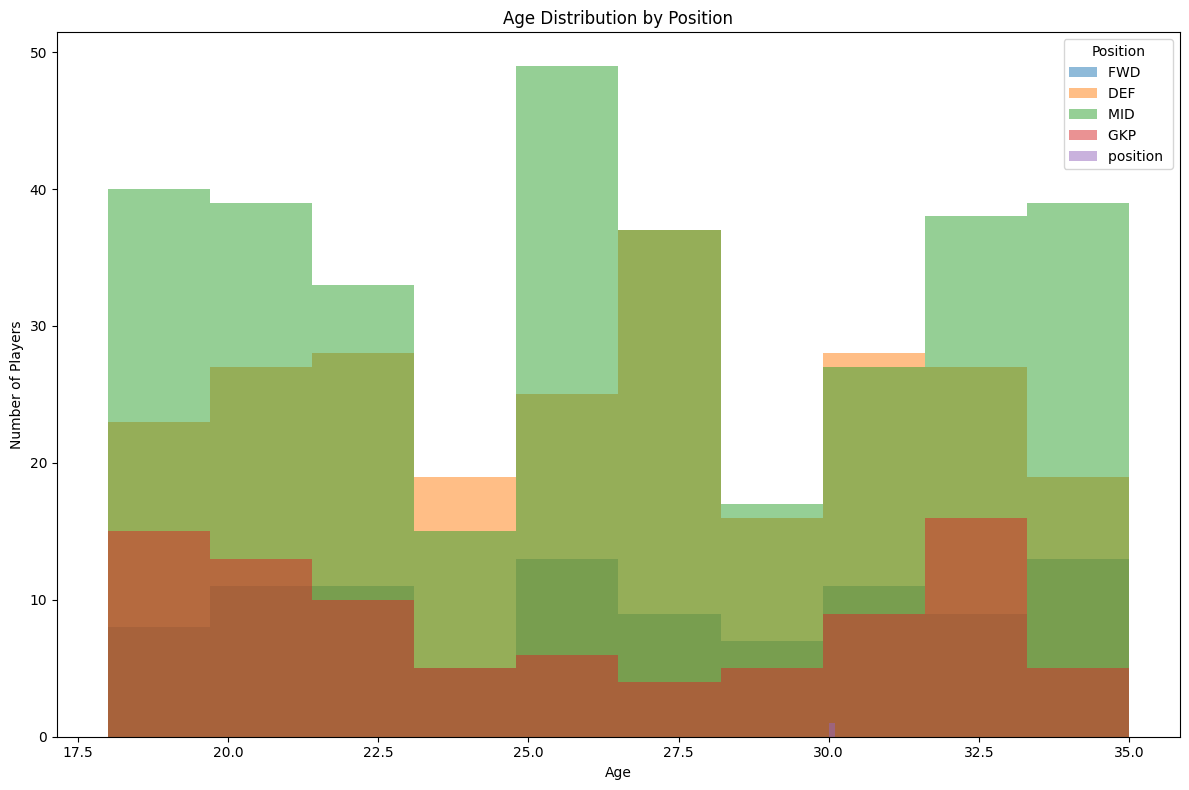

In [102]:

# Plot histograms for each position
positions = data['position '].unique()
plt.figure(figsize=(12, 8))

for position in positions:
    age_store = data[data['position '] == position]
    plt.hist(age_store['age'], bins=10, alpha=0.5, label=position)

plt.title('Age Distribution by Position')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.legend(title='Position')
plt.tight_layout()

# Show the plot
plt.show()


## Bieu Do Chan Thuong

C:\Users\LAM KY\AppData\Local\Temp\ipykernel_3348\866016121.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injury_data['main_injury'] = injury_data['news                                                                  '].apply(extract_main_injury)


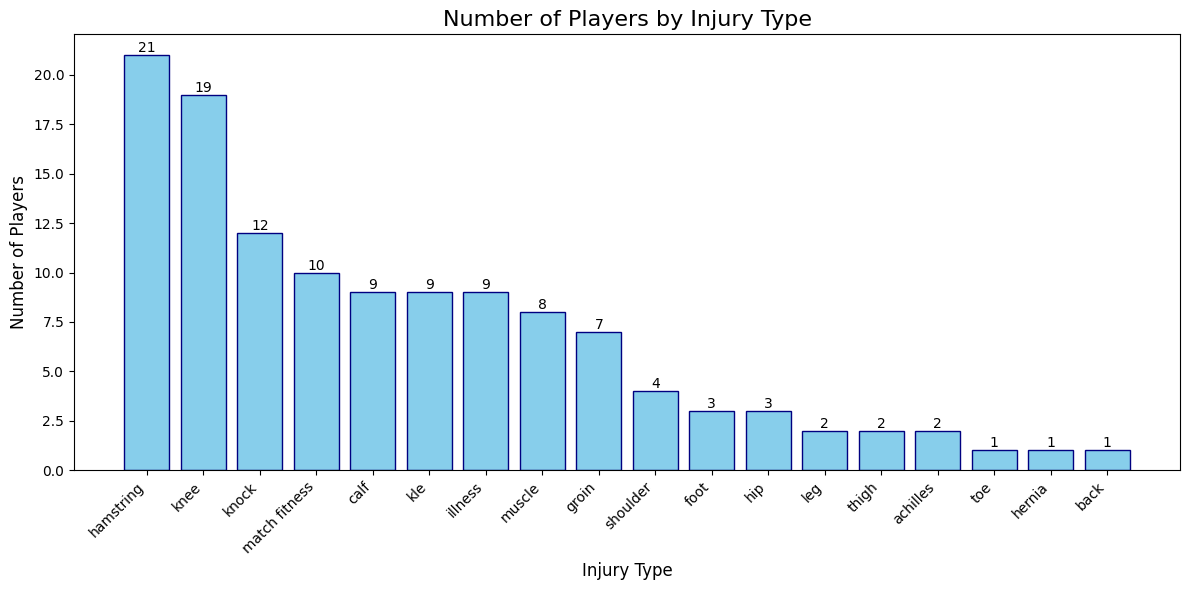

In [103]:

# Hàm để trích xuất loại chấn thương chính
def extract_main_injury(injury_text):
    injury_text = injury_text.lower()
    if 'injury' in injury_text:
        # Tìm vị trí của từ 'injury'
        injury_index = injury_text.index('injury')
        # Lấy phần trước 'injury'
        main_injury = injury_text[:injury_index].strip()
        # Loại bỏ các từ không cần thiết
        words_to_remove = ['and', 'or', 'the', 'an']
        for word in words_to_remove:
            main_injury = main_injury.replace(word, '').strip()
        return main_injury
    else:
        return 'Other'

# Lọc dữ liệu chấn thương và xử lý
injury_data = data[data['news                                                                  '].str.contains('injury', case=False, na=False)]
injury_data['main_injury'] = injury_data['news                                                                  '].apply(extract_main_injury)


injury_counts = injury_data['main_injury'].value_counts()

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
bars = plt.bar(injury_counts.index, injury_counts.values, color='skyblue', edgecolor='navy')

# Thêm nhãn số lượng lên đầu mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.title('Number of Players by Injury Type', fontsize=16)
plt.xlabel('Injury Type', fontsize=12)
plt.ylabel('Number of Players', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

## biểu đồ thể hiện mức độ tuổi trung bình của các đội bóng và số cầu thủ trẻ trong đội lấy 5 đội bóng ngẫu nhiên

In [104]:


# Tính tuổi trung bình và số cầu thủ trẻ cho mỗi đội
team_stats = data.groupby('team   ').agg({
    'now_cost': 'mean',  # Sử dụng 'now_cost' thay cho tuổi
    'now_cost': lambda x: sum(x < 50)  # Đếm số cầu thủ có giá trị dưới 50 (coi là cầu thủ trẻ)
}).reset_index()

team_stats.columns = ['team', 'avg_cost', 'young_players']

# Chọn ngẫu nhiên 5 đội
random_teams = team_stats.sample(n=5)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ cột cho giá trị trung bình
plt.bar(random_teams['team'], random_teams['avg_cost'], label='Giá trị trung bình')

# Vẽ cột cho số cầu thủ trẻ
plt.bar(random_teams['team'], random_teams['young_players'], label='Số cầu thủ trẻ')

# Cài đặt trục x và y
plt.xlabel('Đội bóng')
plt.ylabel('Giá trị')

# Xoay nhãn trục x để dễ đọc
plt.xticks(rotation=45, ha='right')

# Thêm tiêu đề và chú thích
plt.title('Giá trị trung bình và số cầu thủ trẻ của 5 đội bóng ngẫu nhiên')
plt.legend()

plt.tight_layout()
plt.show()

KeyError: 'team   '